In [99]:
# !pip install sentence-transformers

In [100]:
# !pip install hdbscan


In [101]:
# !pip install umap-learn

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer
import hdbscan
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [103]:
df=pd.read_csv(r"C:\MMA\Winter 2025\INSY 695 - Production\Group Project\final_Clean_flattened_cleaned_Official_V2.csv")

In [104]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,job_id,industry_id,salary_id,currency_x,compensation_type_x,company_name,title,description_x,location,company_id,views,formatted_work_type,applies,remote_allowed,job_posting_url,application_type,formatted_experience_level,sponsored,work_type,compensation_type_y,normalized_salary,employee_count,follower_count,description_y,company_size,state,country,city,zip_code_y,address,url,industry,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,min_hourly_salary_in_usd,ListedDate,ListedTime,ExpieryDate,ExpieryTime,401(k),Child care support,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,CompApplication,full_description,cleaned_full_description,extracted_skills,combined_features,TitleClean
0,3884431523,56,3.0,USD,BASE_SALARY,Energy Fuels Inc,Mine Foreman,GENERAL PURPOSE:Under the general direction of...,Greater Flagstaff Area,947812.0,4.0,Full-time,0.0,0.0,https://www.linkedin.com/jobs/view/3884431523/...,ComplexOnsiteApply,Mid-Senior level,0.0,FULL_TIME,BASE_SALARY,110000.0,102.000000,2831.000000,Energy Fuels (NYSE MKT UUUU | TSX:EFR) is a le...,2.0,Colorado,US,Lakewood,80228,225 Union Blvd.,https://www.linkedin.com/company/energy-fuels-...,Mining,120000.0,100000.0,57.692308,48.076923,2024-04-05,19:35:01,2024-05-05,19:35:01,1,0,0,1,0,1,0,0,0,0,0,1,0,GENERAL PURPOSE:Under the general direction of...,purpose direction superintendent position vers...,"['education', 'equipment', 'state', 'developme...",[0. 0.02371779 0.06454172 0.61997699 0...,project manager
1,3884911725,12,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
2,3884911725,17,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
3,3884911725,15,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'pla

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39958 entries, 0 to 39957
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      39958 non-null  int64  
 1   industry_id                 39958 non-null  int64  
 2   salary_id                   39958 non-null  float64
 3   currency_x                  39958 non-null  object 
 4   compensation_type_x         39958 non-null  object 
 5   company_name                39958 non-null  object 
 6   title                       39958 non-null  object 
 7   description_x               39958 non-null  object 
 8   location                    39958 non-null  object 
 9   company_id                  39958 non-null  float64
 10  views                       39958 non-null  float64
 11  formatted_work_type         39958 non-null  object 
 12  applies                     39958 non-null  float64
 13  remote_allowed              399

In [106]:
unique_values = df.nunique()
print(unique_values)

job_id                        29040
industry_id                     378
salary_id                     29040
currency_x                        5
compensation_type_x               1
company_name                   9062
title                         20084
description_x                 27567
location                       3750
company_id                     9070
views                           481
formatted_work_type               7
applies                         201
remote_allowed                    2
job_posting_url               29040
application_type                  4
formatted_experience_level        7
sponsored                         1
work_type                         7
compensation_type_y               1
normalized_salary              6398
employee_count                 3850
follower_count                 7729
description_y                  9067
company_size                      8
state                           394
country                          42
city                        

In [107]:
df.columns.tolist()

['job_id',
 'industry_id',
 'salary_id',
 'currency_x',
 'compensation_type_x',
 'company_name',
 'title',
 'description_x',
 'location',
 'company_id',
 'views',
 'formatted_work_type',
 'applies',
 'remote_allowed',
 'job_posting_url',
 'application_type',
 'formatted_experience_level',
 'sponsored',
 'work_type',
 'compensation_type_y',
 'normalized_salary',
 'employee_count',
 'follower_count',
 'description_y',
 'company_size',
 'state',
 'country',
 'city',
 'zip_code_y',
 'address',
 'url',
 'industry',
 'max_salary_in_usd',
 'min_salary_in_usd',
 'max_hourly_salary_in_usd',
 'min_hourly_salary_in_usd',
 'ListedDate',
 'ListedTime',
 'ExpieryDate',
 'ExpieryTime',
 '401(k)',
 'Child care support',
 'Commuter benefits',
 'Dental insurance',
 'Disability insurance',
 'Medical insurance',
 'Paid maternity leave',
 'Paid paternity leave',
 'Pension plan',
 'Student loan assistance',
 'Tuition assistance',
 'Vision insurance',
 'CompApplication',
 'full_description',
 'cleaned_full_d

In [108]:
df['country'].value_counts()

country
US    35991
GB     1722
0       608
CA      327
FR      160
CH      156
IN      134
DE      134
OO      102
NL       97
SE       68
JP       64
IE       63
NO       47
DK       41
AU       35
SG       27
CN       26
BE       24
IL       21
IT       18
MX       12
ES       10
HK        9
BM        7
TW        7
LU        7
ZA        6
AE        6
AT        5
FI        5
MT        4
PA        3
NZ        2
HU        2
PR        2
BR        1
IS        1
KR        1
LB        1
KY        1
PK        1
Name: count, dtype: int64

# Cleaning pipeline for SVM and HDBSCAN

In [109]:
import pandas as pd

def filter_us_jobs(df):
    """Keeps only job postings from the US."""
    return df[df['country'] == 'US']

def extract_job_city(df):
    """Extracts the job city from the 'location' column."""
    df['job_city'] = df['location'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) and ',' in x else x)
    return df

def standardize_city_names(df):
    """Standardizes city names to remove duplicates and inconsistencies."""
    city_mappings = {
        "New York City Metropolitan Area": "New York",
        "San Francisco Bay Area": "San Francisco",
        "Los Angeles Metropolitan Area": "Los Angeles",
        "Brooklyn": "New York",
        "Dallas-Fort Worth Metroplex": "Dallas",
        "United States": None,  # Remove rows where city is just "United States"
        "California": None,  # Remove ambiguous state-level entries
    }
    
    df['job_city'] = df['job_city'].replace(city_mappings)
    
    # Drop rows where 'job_city' is now NaN (after replacements)
    df = df.dropna(subset=['job_city'])
    
    return df

def filter_cities_by_postings(df, min_postings=100):
    """Keeps only cities with more than `min_postings` job postings."""
    city_counts = df['job_city'].value_counts()
    valid_cities = city_counts[city_counts > min_postings].index
    return df[df['job_city'].isin(valid_cities)]

def save_data(df, output_filepath):
    """Saves the cleaned dataset to a CSV file."""
    df.to_csv(output_filepath, index=False)

def clean_job_postings_pipeline(df, output_filepath):
    """Full pipeline to clean job postings data."""
    # Cleaning steps
    df = filter_us_jobs(df)
    df = extract_job_city(df)
    df = standardize_city_names(df)
    df = filter_cities_by_postings(df, min_postings=100)

    # Saving cleaned data
    save_data(df, output_filepath)

    return df  # Returning the cleaned dataframe for further use

# Example usage
# Assuming `df` is already loaded
cleaned_df = clean_job_postings_pipeline(df, "cleaned_dataset.csv")

# Display the first few rows
print(cleaned_df.head())


C:\Users\melam\AppData\Local\Temp\ipykernel_46264\1818065908.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_city'] = df['location'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) and ',' in x else x)
C:\Users\melam\AppData\Local\Temp\ipykernel_46264\1818065908.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_city'] = df['job_city'].replace(city_mappings)


        job_id  industry_id  salary_id currency_x compensation_type_x  \
4   3887473220           43        5.0        USD         BASE_SALARY   
10  3884435029           27       11.0        USD         BASE_SALARY   
18  3887467990           96       18.0        USD         BASE_SALARY   
19  3887467990           14       18.0        USD         BASE_SALARY   
22  3884434034           48       21.0        USD         BASE_SALARY   

                      company_name                             title  \
4               Motion Recruitment                   Project Manager   
10                          Aquent             Data Entry Specialist   
18                      Convergenz  Senior Financial Project Manager   
19                      Convergenz  Senior Financial Project Manager   
22  Wesbuilt Construction Managers         Assistant Project Manager   

                                        description_x  \
4   Our client, a financial services company, is l...   
10  Job Title:

In [110]:
cleaned_df['job_city'].value_counts()

job_city
New York            2613
Los Angeles          766
San Francisco        609
Dallas               459
Chicago              455
Seattle              453
Denver               426
San Diego            387
Atlanta              356
Boston               343
Washington           343
Austin               321
Houston              320
San Jose             315
Charlotte            284
Phoenix              262
Irvine               225
Sacramento           222
St Louis             205
Portland             202
Philadelphia         181
Miami                177
Raleigh              175
Tampa                174
Columbus             162
Minneapolis          161
Indianapolis         148
Orlando              134
Bellevue             134
Baltimore            127
Rochester            126
Sunnyvale            123
San Antonio          122
Kansas City          121
Louisville           118
Las Vegas            114
Nashville            113
Irving               111
Albany               110
Santa Clara     

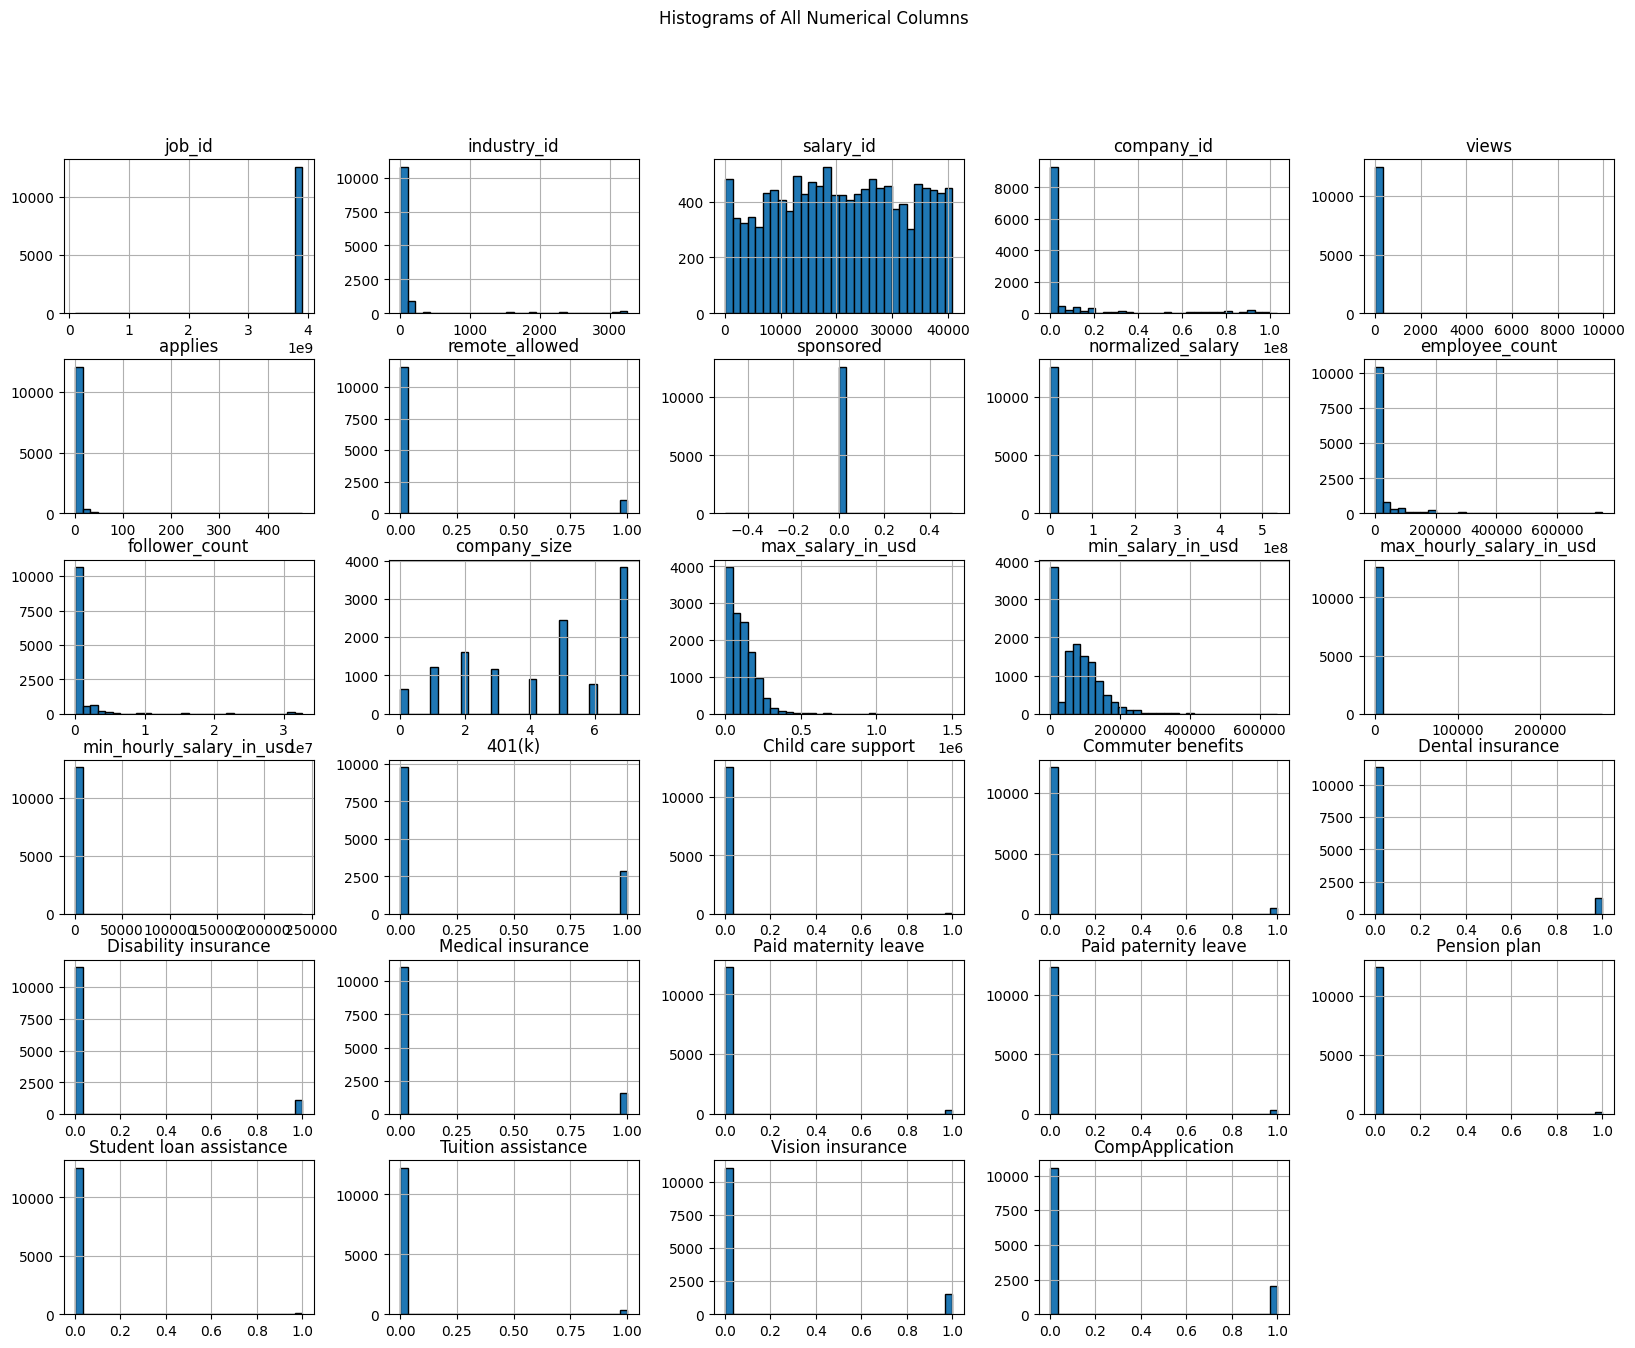

In [111]:
import matplotlib.pyplot as plt

# Plot histograms of all numerical columns
cleaned_df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of All Numerical Columns')  # Add a title to the figure
plt.show()

In [112]:
cleaned_df.describe()

,job_id,industry_id,salary_id,company_id,views,applies,remote_allowed,sponsored,normalized_salary,employee_count,follower_count,company_size,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,min_hourly_salary_in_usd,401(k),Child care support,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,CompApplication
count,1.262100e+04,12621.000000,12621.000000,1.262100e+04,12621.000000,12621.000000,12621.000000,12621.0,1.262100e+04,12621.000000,1.262100e+04,12621.000000,1.262100e+04,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.00000,12621.000000,12621.000000,12621.000000,12621.000000
mean,3.897464e+09,199.458918,20757.726091,1.022342e+07,24.210126,2.951113,0.081848,0.0,2.172880e+05,24417.461789,1.103208e+06,4.385706,1.052332e+05,73181.954458,118.154837,90.775979,0.224863,0.007131,0.037081,0.099041,0.085889,0.125822,0.028365,0.027415,0.01656,0.006735,0.030109,0.122653,0.162348
std,6.691529e+07,578.767263,11582.612442,2.325708e+07,192.534679,13.283012,0.274143,0.0,6.059166e+06,77611.574552,4.090734e+06,2.307955,1.022250e+05,64138.346687,3144.102711,2683.427332,0.417509,0.084147,0.188968,0.298729,0.280211,0.331662,0.166021,0.163295,0.12762,0.081792,0.170893,0.328051,0.368785
min,9.170073e+07,1.000000,5.000000,1.009000e+03,0.000000,0.000000,0.000000,0.0,1.850000e+01,0.000000,1.000000e+00,0.000000,7.250000e+00,1.000000,0.009135,0.000481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.895521e+09,16.000000,11094.000000,1.105600e+04,3.000000,0.000000,0.000000,0.0,6.890000e+04,144.000000,1.733567e+04,2.000000,7.500000e+01,62.000000,37.000000,28.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.901991e+09,44.000000,20654.000000,1.656020e+05,5.000000,0.000000,0.000000,0.0,1.025000e+05,1418.500000,8.737967e+04,5.000000,9.500000e+04,70246.000000,55.913462,40.865385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.904585e+09,96.000000,30411.000000,3.753860e+06,13.000000,1.000000,0.000000,0.0,1.453979e+05,13549.000000,4.480780e+05,7.000000,1.600000e+05,112000.000000,81.321154,59.471154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.906266e+09,3250.000000,40779.000000,1.034565e+08,9949.000000,472.000000,1.000000,0.0,5.356000e+08,748029.500000,3.266054e+07,7.000000,1.500000e+06,650000.000000,275000.000000,240000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [113]:
unique_values = cleaned_df.nunique()
print(unique_values)

job_id                        9066
industry_id                    298
salary_id                     9066
currency_x                       1
compensation_type_x              1
company_name                  3564
title                         7188
description_x                 8727
location                        94
company_id                    3565
views                          269
formatted_work_type              6
applies                        109
remote_allowed                   2
job_posting_url               9066
application_type                 3
formatted_experience_level       7
sponsored                        1
work_type                        6
compensation_type_y              1
normalized_salary             2693
employee_count                2079
follower_count                3425
description_y                 3563
company_size                     8
state                          142
country                          1
city                           706
zip_code_y          

# Full Preprocessing Pipeline - SVM & DBSCAN

In [114]:
### Step 1: Define Column Groups

# Numerical features
numerical_cols = ['normalized_salary', 'views', 'applies', 'employee_count', 'follower_count']

# Binary predictors (Excluded from HDBSCAN)
binary_cols = ['remote_allowed', 'Child care support', 'Commuter benefits', 'Dental insurance',
               'Disability insurance', 'Medical insurance', 'Paid maternity leave', 
               'Paid paternity leave', 'Pension plan', 'Student loan assistance', 
               'Tuition assistance', 'Vision insurance', 'CompApplication']

# Low-cardinality categorical features (for One-Hot Encoding)
categorical_cols = ['formatted_work_type', 'formatted_experience_level', 'application_type']

# High-cardinality categorical feature (for PCA)
high_cardinality_col = ['industry']


In [115]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        # Ensure date columns are datetime
        X['ListedDate'] = pd.to_datetime(X['ListedDate'])
        X['ExpieryDate'] = pd.to_datetime(X['ExpieryDate'])

        # Days active (avoid division by zero)
        X['days_active'] = (X['ExpieryDate'] - X['ListedDate']).dt.days.replace(0, 1)

        # Derived engagement metrics
        X['views_per_day'] = X['views'] / X['days_active']
        X['applies_per_day'] = X['applies'] / X['days_active']

        # Salary difference percentage
        X['salary_diff_percentage'] = (X['max_salary_in_usd'] - X['min_salary_in_usd']) / X['min_salary_in_usd']
        X['salary_diff_percentage'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division errors

        # Apply log transformation to skewed numerical features
        log_transform_cols = ['views_per_day', 'applies_per_day', 'salary_diff_percentage'] + numerical_cols

        for col in log_transform_cols:
            if col in X.columns:
                X[col + '_log'] = np.log1p(X[col])  # log1p(x) = log(1 + x), avoids log(0) issue

        # Drop the original (non-log) numerical columns and EXCLUDE views_log, applies_log
        drop_cols = log_transform_cols + ['views_log', 'applies_log']
        X.drop(columns=drop_cols, errors='ignore', inplace=True)

        # Drop unnecessary columns
        extra_drop_cols = ['ListedDate', 'ExpieryDate', 'job_id', 'company_id', 'job_posting_url', 'address', 'url', 'zip_code_y']
        X.drop(columns=[col for col in extra_drop_cols if col in X.columns], errors='ignore', inplace=True)

        return X


In [116]:
# Apply Feature Engineering to get the transformed dataset
feature_engineering = FeatureEngineering()
cleaned_df = feature_engineering.transform(cleaned_df)

# Extract log-transformed numerical columns dynamically
log_numerical_cols = [col for col in cleaned_df.columns if col.endswith('_log') and col not in ['views_log', 'applies_log']]


C:\Users\melam\AppData\Local\Temp\ipykernel_46264\727462029.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['salary_diff_percentage'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division errors


In [117]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer


# StandardScaler for log-transformed numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale only log-transformed values
])

# One-Hot Encoding for low-cardinality categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# PCA for high-cardinality categorical feature (`industry`)
high_card_pca_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),  
    ('pca', PCA(n_components=10))  # Reduce to 10 components
])

# 🚀 Fixed Job Title Embeddings Transformer
class JobTitleEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        self.model_name = model_name
        self.model = SentenceTransformer(self.model_name)

    def transform(self, X):
        if isinstance(X, pd.DataFrame):  
            X = X.squeeze()  
        if isinstance(X, pd.Series):  
            X = X.tolist()

        # Handle missing values
        X = [str(title) if pd.notna(title) else "" for title in X]
        embeddings = np.array([self.model.encode(title) for title in X])

        # Ensure shape consistency
        if embeddings.shape[0] != len(X):
            raise ValueError(f"Mismatch in row count: Expected {len(X)}, but got {embeddings.shape[0]}")

        return embeddings

    def fit(self, X, y=None):
        return self

# Job Title Transformer Pipeline
job_title_transformer = Pipeline(steps=[
    ('embedding', JobTitleEmbeddingTransformer())
])

# Combine all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, log_numerical_cols),  # ✅ Uses extracted log-transformed numericals
        ('cat', cat_transformer, categorical_cols),
        ('pca', high_card_pca_transformer, high_cardinality_col),
        ('title', job_title_transformer, ['TitleClean'])
    ]
)



In [118]:

# Apply preprocessing pipeline
cleaned_df_transformed = preprocessor.fit_transform(cleaned_df)

# Extract transformed feature names
column_names = log_numerical_cols + \
               list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)) + \
               [f'industry_PC{i}' for i in range(10)] + \
               [f'title_emb_{i}' for i in range(384)]  # Assuming 384 embedding dimensions

# Convert transformed array to DataFrame
cleaned_df_transformed = pd.DataFrame(cleaned_df_transformed, columns=column_names)

# Print final shape
print(f"Final dataset shape after transformations: {cleaned_df_transformed.shape}")


Final dataset shape after transformations: (12621, 416)


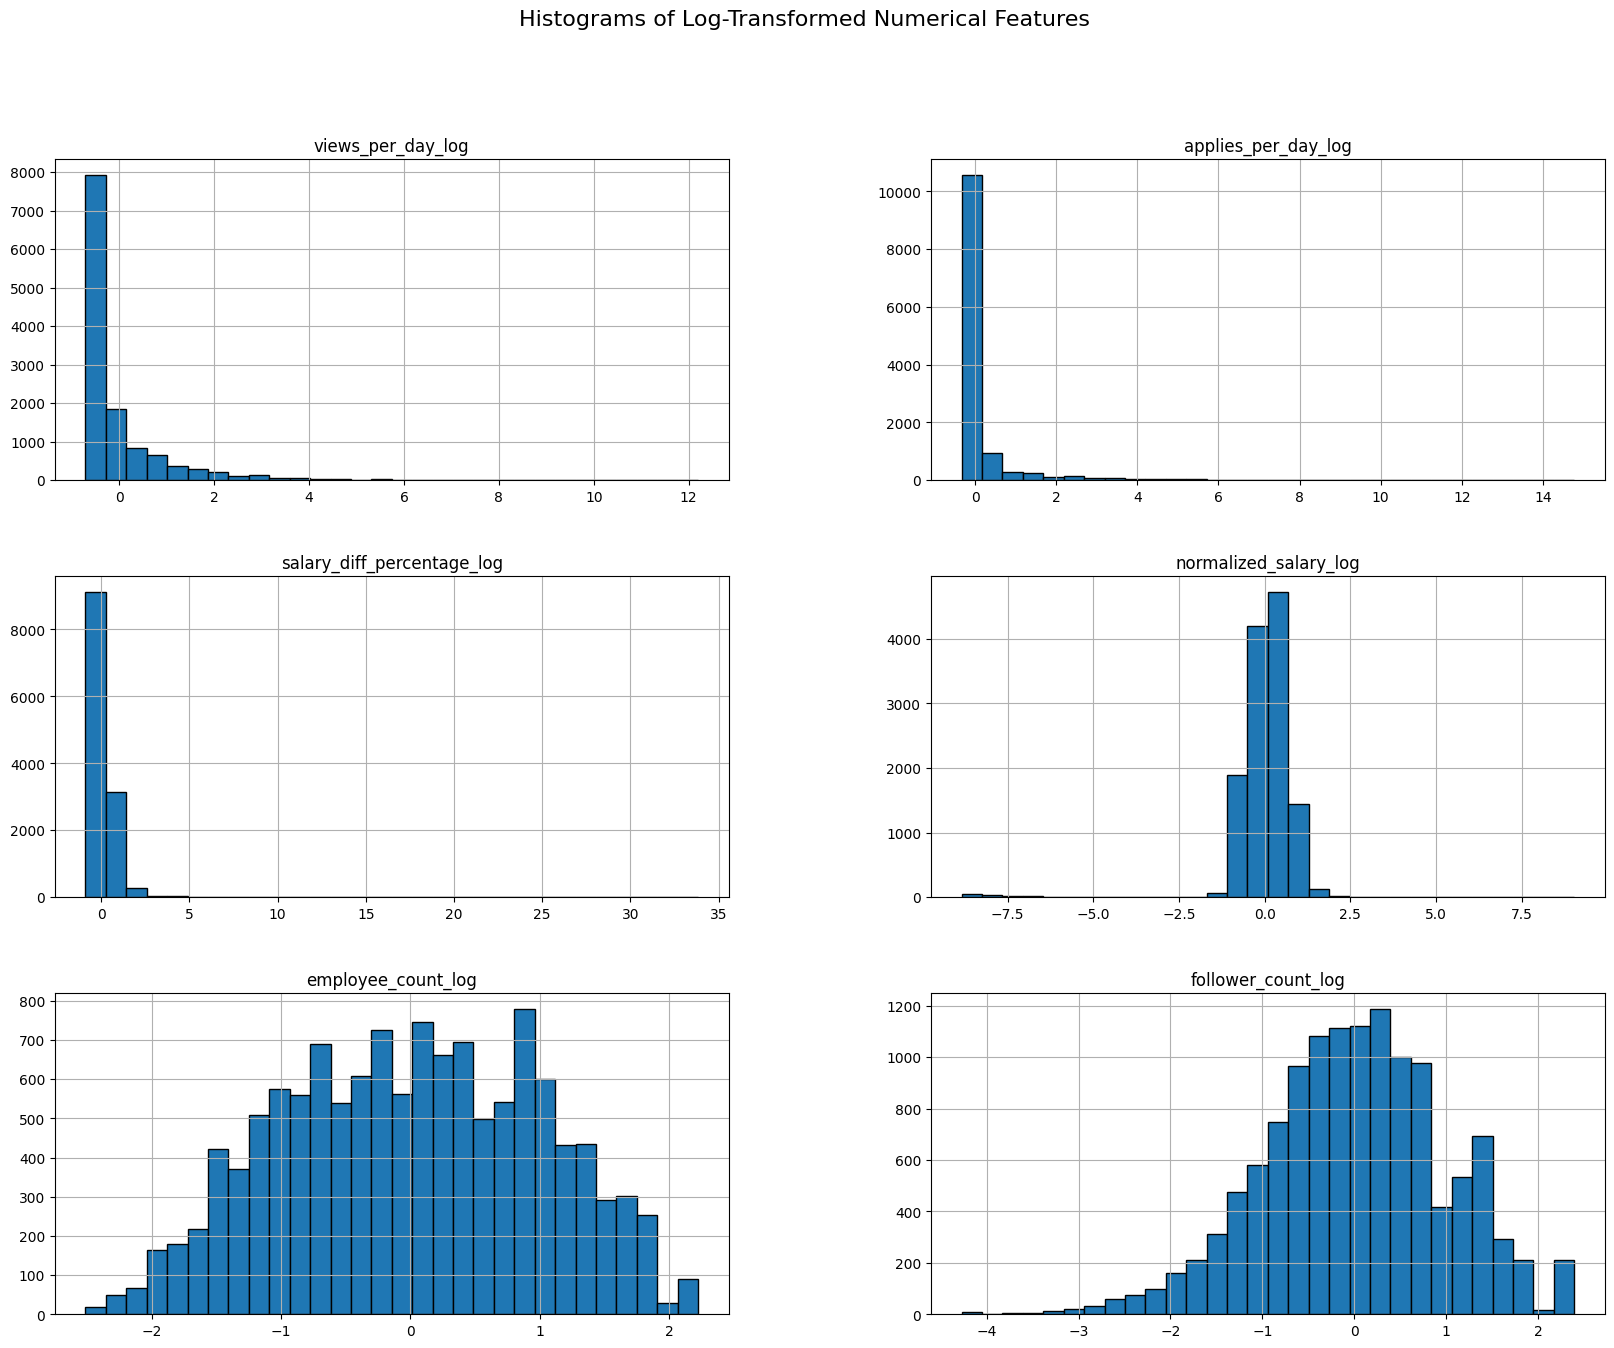

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of log-transformed numerical columns
cleaned_df_transformed[log_numerical_cols].hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Numerical Features', fontsize=16)
plt.show()


# HDBSCAN

In [158]:
import hdbscan
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### 🔹 Step 1: Prepare Features ###
hdbscan_features = [col for col in cleaned_df_transformed.columns if col not in binary_cols]

### 🔹 Step 2: Apply Dimensionality Reduction ###
# Choose one: PCA or UMAP (recommended for dense clusters)
use_pca = True  # Set to False to use UMAP instead

if use_pca:
    # Reduce dimensionality using PCA
    pca = PCA(n_components=60)
    reduced_features = pca.fit_transform(cleaned_df_transformed[hdbscan_features])
else:
    # Reduce dimensionality using UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=20, random_state=42)
    reduced_features = reducer.fit_transform(cleaned_df_transformed[hdbscan_features])


In [173]:
import hdbscan

# Update HDBSCAN parameters
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=200,  # Try reducing from 200 to 100
    min_samples=2,  # Reduce to allow more points in clusters
    cluster_selection_method='leaf',  # Helps merge similar clusters
    allow_single_cluster=True
)

# Re-run HDBSCAN on the same reduced features (PCA or UMAP)
cleaned_df_transformed['hdbscan_cluster'] = clusterer.fit_predict(reduced_features)

# Count noise points
num_noise = sum(cleaned_df_transformed['hdbscan_cluster'] == -1)
print(f"Number of noise (outlier) points detected: {num_noise}")


Number of noise (outlier) points detected: 1315


In [174]:

### 🔹 Step 5: Compute Silhouette Score ###
valid_clusters = cleaned_df_transformed[cleaned_df_transformed['hdbscan_cluster'] != -1]

if len(valid_clusters['hdbscan_cluster'].unique()) > 1:
    sil_score = silhouette_score(reduced_features[valid_clusters.index], valid_clusters['hdbscan_cluster'])
    print(f"Silhouette Score (excluding noise points): {sil_score:.4f}")
else:
    print("Silhouette score cannot be computed as there is only one cluster.")


Silhouette Score (excluding noise points): 0.3944


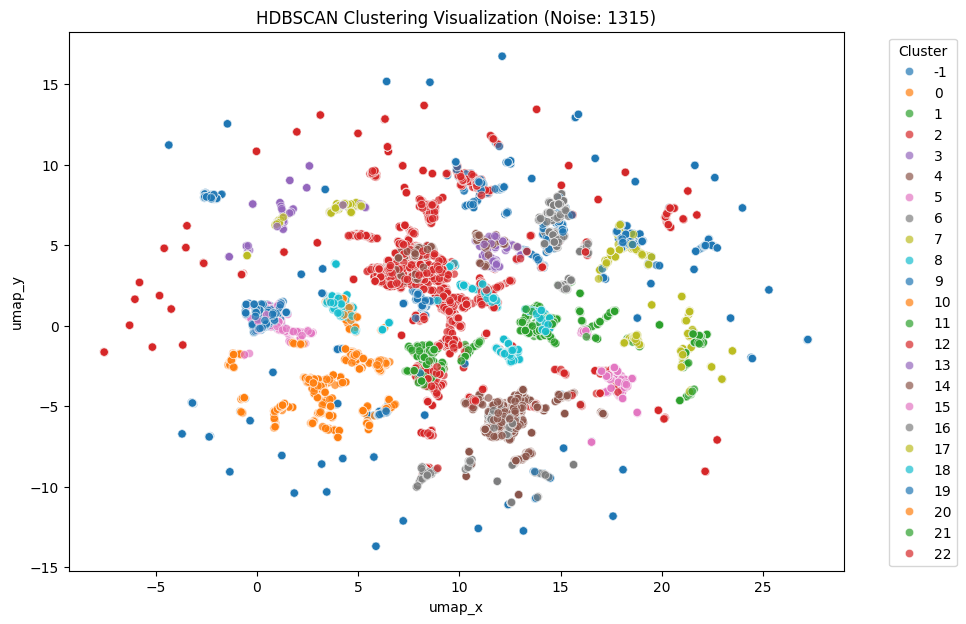

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='umap_x', y='umap_y',
    hue='hdbscan_cluster',
    palette='tab10',
    data=cleaned_df_transformed,
    alpha=0.7
)
plt.title(f'HDBSCAN Clustering Visualization (Noise: {num_noise})')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [176]:
cluster_counts = cleaned_df_transformed['hdbscan_cluster'].value_counts()

cluster_counts_df = pd.DataFrame(cluster_counts).reset_index()
cluster_counts_df.columns = ['Cluster', 'Count']
display(cluster_counts_df)



,Cluster,Count
0,22,1643
1,-1,1315
2,12,957
3,4,957
4,2,717
5,8,537
6,19,528
7,6,511
8,10,504
9,16,481


In [177]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute silhouette scores per instance
silhouette_vals = silhouette_samples(reduced_features, cleaned_df_transformed['hdbscan_cluster'])

# Compute mean silhouette score per cluster
cluster_silhouette_scores = {
    cluster: np.mean(silhouette_vals[cleaned_df_transformed['hdbscan_cluster'] == cluster])
    for cluster in cluster_counts.index
}

# Display clusters with highest silhouette scores
sorted_clusters = sorted(cluster_silhouette_scores.items(), key=lambda x: x[1], reverse=True)
for cluster, score in sorted_clusters[:10]:  # Top 10 best clusters
    print(f"Cluster {cluster}: Silhouette Score = {score:.3f}")


Cluster 21: Silhouette Score = 0.804
Cluster 0: Silhouette Score = 0.695
Cluster 15: Silhouette Score = 0.688
Cluster 14: Silhouette Score = 0.590
Cluster 19: Silhouette Score = 0.587
Cluster 13: Silhouette Score = 0.569
Cluster 11: Silhouette Score = 0.561
Cluster 4: Silhouette Score = 0.554
Cluster 5: Silhouette Score = 0.551
Cluster 3: Silhouette Score = 0.539


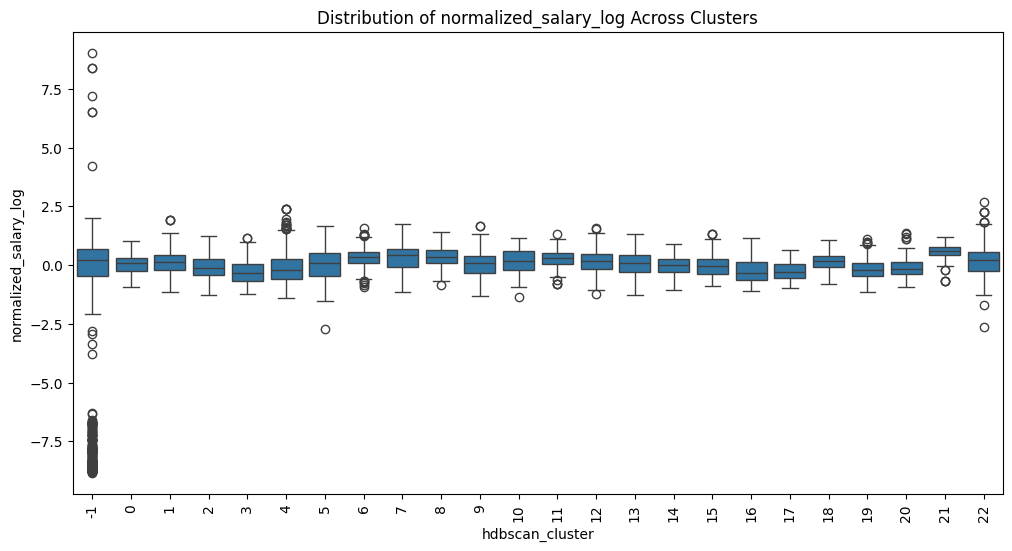

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature to analyze (change this as needed)
feature = "normalized_salary_log"

plt.figure(figsize=(12, 6))
sns.boxplot(x='hdbscan_cluster', y=feature, data=cleaned_df_transformed)
plt.xticks(rotation=90)
plt.title(f"Distribution of {feature} Across Clusters")
plt.show()


In [182]:
engagement_clusters = cleaned_df_transformed.groupby("hdbscan_cluster")[["views_per_day_log", "applies_per_day_log"]].mean()
display(engagement_clusters)


,views_per_day_log,applies_per_day_log
hdbscan_cluster,,
-1,-0.023802,-0.039989
0,-0.285503,-0.247286
1,-0.021581,-0.103562
2,-0.361569,-0.311534
3,0.297395,0.152189
4,-0.243944,-0.254826
5,-0.014025,-0.084720
6,-0.303678,-0.241271
7,0.023073,-0.133790


In [183]:
industry_pca_features = [col for col in cleaned_df_transformed.columns if "industry_PC" in col]

# Compute average industry presence in each cluster
industry_summary = cleaned_df_transformed.groupby("hdbscan_cluster")[industry_pca_features].mean()

import pandas as pd
industry_summary_df = pd.DataFrame(industry_summary)
display(industry_summary_df.loc[[21, 0, 15, 14, 19, 13, 11, 4, 5, 3]])  # Show only top clusters


,industry_PC0,industry_PC1,industry_PC2,industry_PC3,industry_PC4,industry_PC5,industry_PC6,industry_PC7,industry_PC8,industry_PC9
hdbscan_cluster,,,,,,,,,,
21,-0.376152,0.766738,-0.392306,-0.109321,0.184280,0.007096,0.003675,0.006659,0.006054,0.001076
0,0.275900,-0.000949,0.018550,0.019529,-0.076856,-0.019331,-0.008752,-0.007183,-0.022769,-0.006461
15,0.720754,-0.006129,-0.031290,-0.013092,0.036230,0.001937,0.001025,0.001877,0.001733,0.000314
14,-0.232664,-0.015702,0.061033,0.040180,-0.215358,-0.057123,0.036144,0.002869,-0.045674,-0.000370
19,-0.186100,-0.025010,0.059905,0.042896,-0.126053,-0.014246,-0.030460,0.000497,-0.037313,0.037930
13,-0.236022,0.009436,0.048955,0.033330,-0.086293,-0.026869,-0.003589,-0.021689,-0.029795,0.013755
11,0.244789,-0.107308,-0.140533,-0.020420,0.033970,-0.004114,-0.003778,-0.001090,0.012383,-0.003001
4,-0.155504,0.011034,0.045199,0.057466,-0.120659,-0.002826,0.019270,-0.013636,-0.025885,-0.004352
5,-0.134123,-0.153610,-0.119389,-0.067428,0.053910,0.002380,-0.017364,0.017135,-0.005169,0.007806


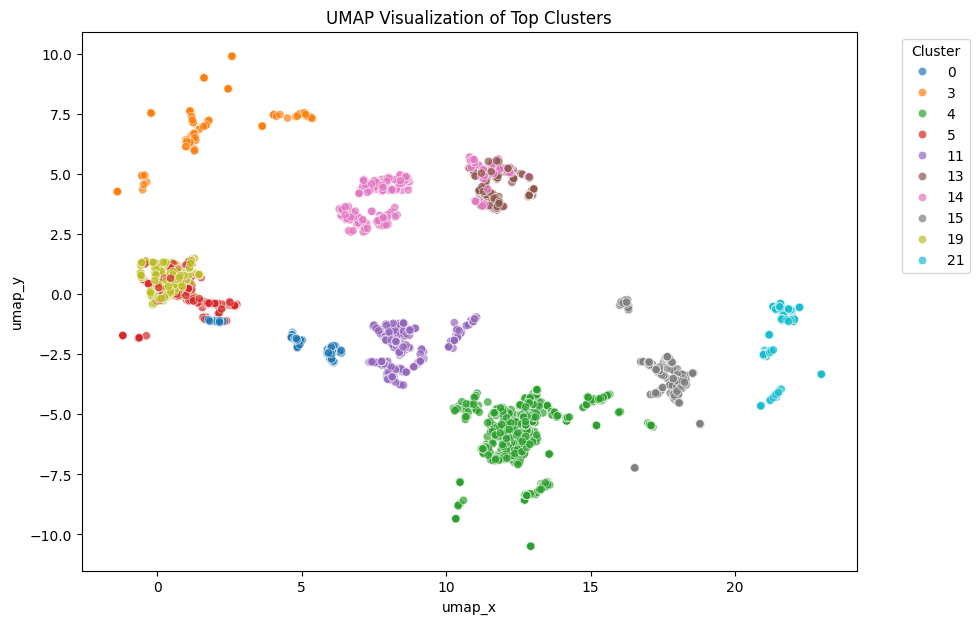

In [184]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='umap_x', y='umap_y',
    hue='hdbscan_cluster',
    palette='tab10',
    data=cleaned_df_transformed[cleaned_df_transformed['hdbscan_cluster'].isin([21, 0, 15, 14, 19, 13, 11, 4, 5, 3])],
    alpha=0.7
)
plt.title(f'UMAP Visualization of Top Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Random Forest for Cluster Interpretation

In [179]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Copy the cleaned DataFrame
df_rf = cleaned_df_transformed.copy()

# Remove noise points
df_rf = df_rf[df_rf['hdbscan_cluster'] != -1]

# Determine top clusters (top 10 by size)
top_clusters = df_rf['hdbscan_cluster'].value_counts().index[:10]

# Re-label smaller clusters as "Other" (-99)
df_rf['hdbscan_cluster_grouped'] = df_rf['hdbscan_cluster'].apply(lambda x: x if x in top_clusters else -99)

# Identify and remove all UMAP-related features
umap_columns = [col for col in df_rf.columns if 'umap' in col]  # Remove all UMAP-derived columns

# Prepare features (excluding cluster labels & UMAP features)
X = df_rf.drop(columns=['hdbscan_cluster', 'hdbscan_cluster_grouped'] + umap_columns)
y = df_rf['hdbscan_cluster_grouped']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (without UMAP features): {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Random Forest Accuracy (without UMAP features): 0.8612
              precision    recall  f1-score   support

         -99       0.84      0.94      0.88       801
           2       0.90      0.93      0.91       143
           4       0.86      0.84      0.85       192
           6       0.89      0.85      0.87       102
           7       0.90      0.81      0.85        93
           8       0.88      0.86      0.87       107
          10       0.96      0.75      0.84       101
          12       0.84      0.82      0.83       192
          16       0.84      0.81      0.83        96
          19       0.91      0.83      0.87       106
          22       0.87      0.75      0.81       329

    accuracy                           0.86      2262
   macro avg       0.88      0.84      0.86      2262
weighted avg       0.86      0.86      0.86      2262



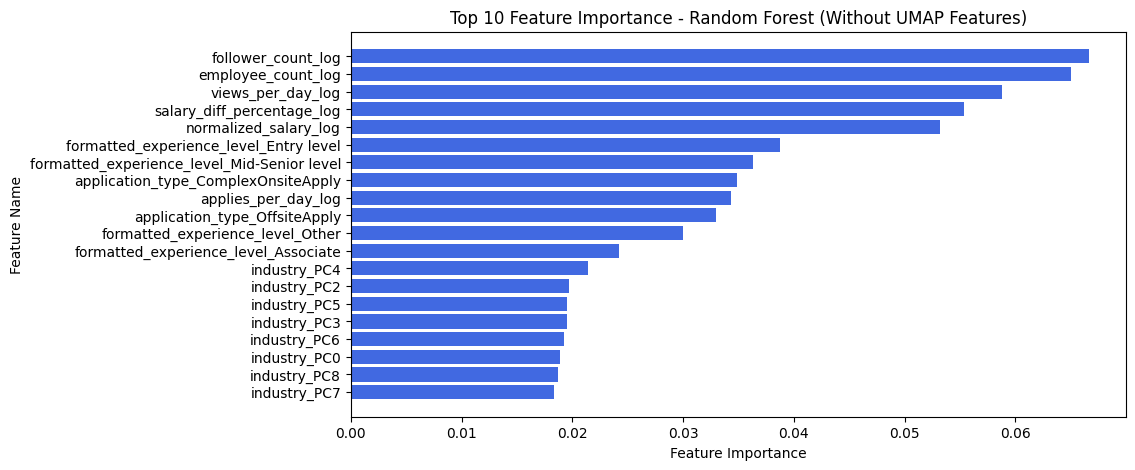

In [180]:

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]

# Plot top 10 most important features
plt.figure(figsize=(10, 5))
plt.barh([feature_names[i] for i in sorted_idx[:20]], importances[sorted_idx[:20]], color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Feature Importance - Random Forest (Without UMAP Features)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [339]:
# Extract the original "industry" column (ensure it exists in the dataset)
industry_data = cleaned_df[['industry']]  # Use the dataset before PCA transformation

# Fit the PCA pipeline on the industry column
high_card_pca_transformer.fit(industry_data)

# Extract fitted OneHotEncoder and PCA components
onehot_encoder = high_card_pca_transformer.named_steps['onehot']
pca_model = high_card_pca_transformer.named_steps['pca']

# Get original industry feature names from OneHotEncoder
industry_feature_names = onehot_encoder.get_feature_names_out(['industry'])

# Extract PCA component loadings
industry_pca_loadings = pca_model.components_

# Create a DataFrame with industry contributions to each PCA component
industry_pca_df = pd.DataFrame(industry_pca_loadings, columns=industry_feature_names, 
                               index=[f"industry_PC{i}" for i in range(industry_pca_loadings.shape[0])])

# Show top 3 contributing industries for each principal component
top_industries_per_pc = {}
for pc in industry_pca_df.index:
    top_industries = industry_pca_df.loc[pc].abs().nlargest(3).index  # Top 3 industries
    top_industries_per_pc[pc] = ", ".join(top_industries)

# Print industry mapping for each PCA component
for pc, industries in top_industries_per_pc.items():
    print(f"{pc}: {industries}")


industry_PC0: industry_Staffing and Recruiting, industry_Software Development, industry_IT Services and IT Consulting
industry_PC1: industry_Software Development, industry_IT Services and IT Consulting, industry_Hospitals and Health Care
industry_PC2: industry_IT Services and IT Consulting, industry_Hospitals and Health Care, industry_Software Development
industry_PC3: industry_Financial Services, industry_Hospitals and Health Care, industry_IT Services and IT Consulting
industry_PC4: industry_Financial Services, industry_Hospitals and Health Care, industry_IT Services and IT Consulting
industry_PC5: industry_Retail, industry_Government Administration, industry_Advertising Services
industry_PC6: industry_Government Administration, industry_Advertising Services, industry_Retail
industry_PC7: industry_Advertising Services, industry_Entertainment Providers, industry_Government Administration
industry_PC8: industry_Entertainment Providers, industry_Non-profit Organizations, industry_Advert